##### Statistical Summary

##### Library Imports

In [303]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


##### Epidemiological Data

In [304]:
# import the epidemiological data
epidemics = pd.read_csv('epidemdata.csv')

# print the first 5 rows of the data
display(epidemics)


,date,new_cases
0,2017-08-07,0
1,2017-08-14,1
2,2017-08-21,2
3,2017-08-28,7
4,2017-09-04,8
5,2017-09-11,33
6,2017-09-18,150
7,2017-09-25,105
8,2017-10-02,384
9,2017-10-09,363


##### Peste Dataset

In [305]:
# import the peste dataset
first_madagascar = pd.read_csv('peste.csv')

# print the first few rows of the dataset
display(first_madagascar)

,Day,peste: (Madagascar)
0,01/08/2017,0
1,02/08/2017,0
2,03/08/2017,0
3,04/08/2017,0
4,05/08/2017,0
...,...,...
107,16/11/2017,0
108,17/11/2017,0
109,18/11/2017,0
110,19/11/2017,0


##### Peste Pulmonaire Dataset

In [306]:
#import the peste pulmonaire dataset
peste_pulmonaire = pd.read_csv('peste_pulmonaire.csv')
display(peste_pulmonaire)


,Day,peste pulmonaire: (Madagascar)
0,01/08/2017,0
1,02/08/2017,0
2,03/08/2017,0
3,04/08/2017,0
4,05/08/2017,0
...,...,...
107,16/11/2017,0
108,17/11/2017,0
109,18/11/2017,0
110,19/11/2017,0


##### Peste Madagascar Dataset

In [307]:
# import the third peste dataset
peste_madagascar = pd.read_csv('peste_madagascar.csv')
display(peste_madagascar)

,Day,peste madagascar: (Madagascar)
0,01/08/2017,0
1,02/08/2017,0
2,03/08/2017,0
3,04/08/2017,0
4,05/08/2017,0
...,...,...
107,16/11/2017,0
108,17/11/2017,0
109,18/11/2017,0
110,19/11/2017,0


##### PART 1: EXPLORE EPIDEMIOLOGICAL DATA

##### Line Plot for Weekly Counts for New Cases

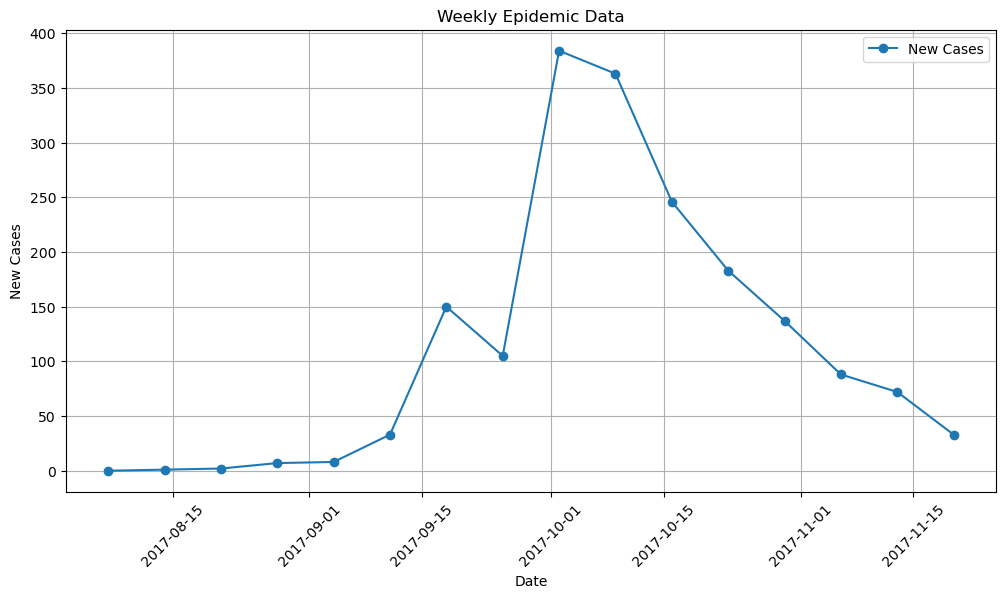

In [308]:
# Create weekly_epidemics dataframe
epidemics['date'] = pd.to_datetime(epidemics['date'])
weekly_epidemics = epidemics.set_index('date').resample('W').sum()

# Plot the time series for new cases each week
plt.figure(figsize=(12, 6))
plt.plot(epidemics['date'], epidemics['new_cases'], marker='o', linestyle='-', label='New Cases')
plt.title('Weekly Epidemic Data')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()


##### First and Last Plague Date

In [309]:
# Find the first and last plague cases
first_case_date = epidemics[epidemics['new_cases'] > 0]['date'].min()
last_case_date = epidemics[epidemics['new_cases'] > 0]['date'].max()

print(f"First plague case was recorded on: {first_case_date.date()}")
print(f"Last plague case was recorded on: {last_case_date.date()}")

First plague case was recorded on: 2017-08-14
Last plague case was recorded on: 2017-11-20


##### Peak Week

In [310]:
# Find the week with the largest number of new cases
peak_week = epidemics.loc[epidemics['new_cases'].idxmax(), 'date']
peak_cases = epidemics['new_cases'].max()

print(f"The outbreak peak was on: {peak_week.date()} with {peak_cases} new cases")

The outbreak peak was on: 2017-10-02 with 384 new cases


##### PART 2: GOOGLE TRENDS DATA

##### Merge the three datasets

In [311]:
# Rename columns
first_madagascar = first_madagascar.rename(columns={'peste (Madagascar)': 'peste1'})
peste_pulmonaire = peste_pulmonaire.rename(columns={'peste pulmonaire: (Madagascar)': 'peste_pulmonaire'})
peste_madagascar = peste_madagascar.rename(columns={'peste madagascar: (Madagascar)': 'peste_madagascar'})

# Merge the datasets
merged_data = pd.merge(first_madagascar, peste_pulmonaire, on='Day', how='outer')
merged_data = pd.merge(merged_data, peste_madagascar, on='Day', how='outer')

# Fill missing values with 0
merged_data = merged_data.fillna(0)
merged_data.to_csv('merged_peste_data.csv', index=False)
display(merged_data)

,Day,peste: (Madagascar),peste_pulmonaire,peste_madagascar
0,01/08/2017,0,0,0
1,01/09/2017,0,0,0
2,01/10/2017,27,44,24
3,01/11/2017,4,0,0
4,02/08/2017,0,0,0
...,...,...,...,...
107,30/08/2017,0,0,0
108,30/09/2017,8,16,0
109,30/10/2017,6,0,0
110,31/08/2017,0,0,0


##### Merge the dataset by week

In [312]:
# Load merged dataset
merged_data = pd.read_csv("merged_peste_data.csv")

# Convert 'Day' column to datetime
merged_data['Day'] = pd.to_datetime(merged_data['Day'], format="%d/%m/%Y")

# Define the starting week (Week 1: August 1-7, 2017)
start_date = pd.to_datetime("01/08/2017", format="%d/%m/%Y")

# Calculate the epidemiological week number
merged_data['Week'] = ((merged_data['Day'] - start_date).dt.days // 7) + 1

# Aggregate data weekly
weekly_data = merged_data.groupby("Week")[["peste: (Madagascar)", "peste_pulmonaire", "peste_madagascar"]].sum()
weekly_data.to_csv("weekly_peste_data.csv")
display(weekly_data)


,peste: (Madagascar),peste_pulmonaire,peste_madagascar
Week,,,
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,73,117,38
8,0,0,0
9,139,160,124


##### Print last date for each of the 16 weeks

In [313]:
# Add a column for the day of the week each week ends
weekly_data['Week_End_Day'] = start_date + pd.to_timedelta((weekly_data.index - 1) * 7 + 6, unit='D')

#replace the Week_End_Day title to Day
weekly_data = weekly_data.rename(columns={'Week_End_Day': 'Date'})

# Display the updated dataframe
display(weekly_data)


,peste: (Madagascar),peste_pulmonaire,peste_madagascar,Date
Week,,,,
1,0,0,0,2017-08-07
2,0,0,0,2017-08-14
3,0,0,0,2017-08-21
4,0,0,0,2017-08-28
5,0,0,0,2017-09-04
6,0,0,0,2017-09-11
7,73,117,38,2017-09-18
8,0,0,0,2017-09-25
9,139,160,124,2017-10-02


##### QUESTION 2.1: Line Plots

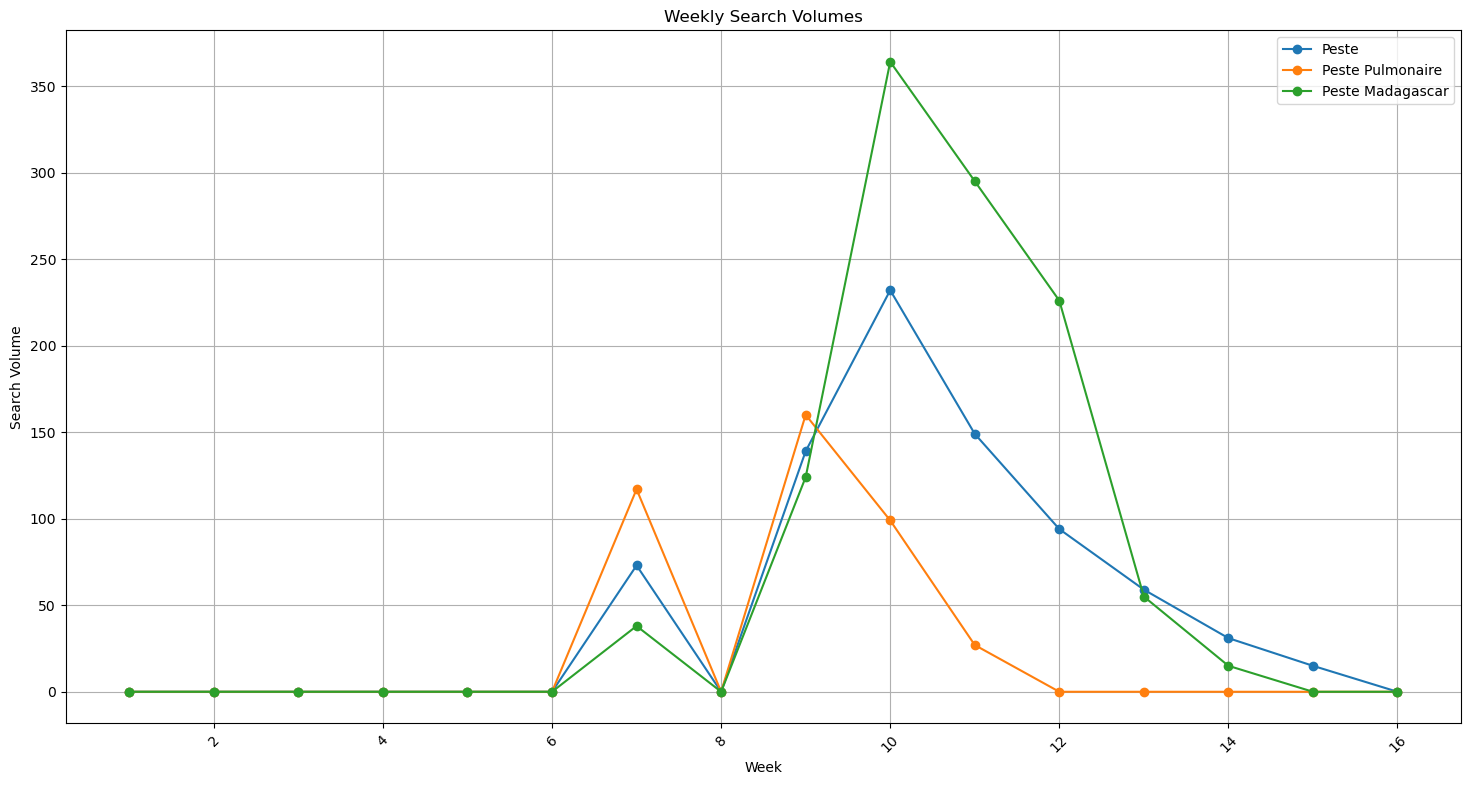

In [314]:
# Plot weekly search volumes
plt.figure(figsize=(18, 9))
plt.plot(weekly_data.index, weekly_data['peste: (Madagascar)'], marker='o', linestyle='-', label='Peste')
plt.plot(weekly_data.index, weekly_data['peste_pulmonaire'], marker='o', linestyle='-', label='Peste Pulmonaire')
plt.plot(weekly_data.index, weekly_data['peste_madagascar'], marker='o', linestyle='-', label='Peste Madagascar')

# Labels and formatting
plt.title('Weekly Search Volumes')
plt.xlabel('Week')
plt.ylabel('Search Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


##### QUESTION 2.1: Line Plot Showing Search Volumes For Each Search Trend & Epidemiological Dataset

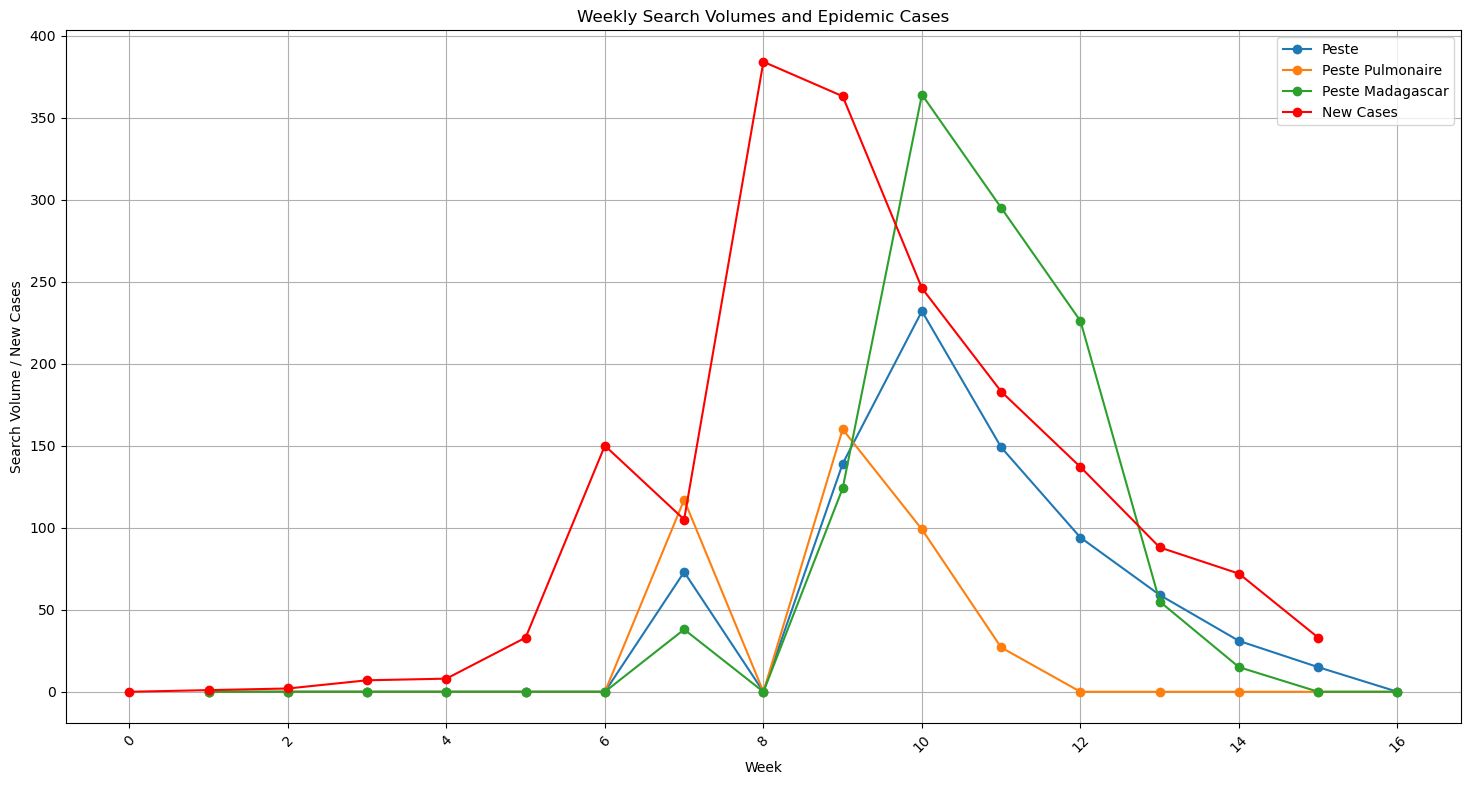

In [315]:
# Plot weekly search volumes
plt.figure(figsize=(18, 9))
plt.plot(weekly_data.index, weekly_data['peste: (Madagascar)'], marker='o', linestyle='-', label='Peste')
plt.plot(weekly_data.index, weekly_data['peste_pulmonaire'], marker='o', linestyle='-', label='Peste Pulmonaire')
plt.plot(weekly_data.index, weekly_data['peste_madagascar'], marker='o', linestyle='-', label='Peste Madagascar')

# Plot the epidemics data
plt.plot(epidemics.index, epidemics['new_cases'], marker='o', linestyle='-', label='New Cases', color='red')

# Labels and formatting
plt.title('Weekly Search Volumes and Epidemic Cases')
plt.xlabel('Week')
plt.ylabel('Search Volume / New Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


##### QUESTION 2.2: First and Last Days Each Search Term Showed up and peaked

In [316]:
# first and last day each search term appeared
first_peste = merged_data[merged_data['peste: (Madagascar)'] > 0].iloc[0]
last_peste = merged_data[merged_data['peste: (Madagascar)'] > 0].iloc[-1]
peak_peste = weekly_data[weekly_data['peste: (Madagascar)'] == weekly_data['peste: (Madagascar)'].max()]

first_pulmonaire = merged_data[merged_data['peste_pulmonaire'] > 0].iloc[0]
last_pulmonaire = merged_data[merged_data['peste_pulmonaire'] > 0].iloc[-1]
peak_pulmonaire = weekly_data[weekly_data['peste_pulmonaire'] == weekly_data['peste_pulmonaire'].max()]

first_madagascar = merged_data[merged_data['peste_madagascar'] > 0].iloc[0]
last_madagascar = merged_data[merged_data['peste_madagascar'] > 0].iloc[-1]
peak_madagascar = weekly_data[weekly_data['peste_madagascar'] == weekly_data['peste_madagascar'].max()]

#peak week for each search term
peak_week_peste = weekly_data['peste: (Madagascar)'].idxmax()
peak_week_pulmonaire = weekly_data['peste_pulmonaire'].idxmax()
peak_week_madagascar = weekly_data['peste_madagascar'].idxmax()

print("Peste:")
print(f"First appearance: {first_peste['Day'].date()}")
print(f"Last appearance: {last_peste['Day'].date()}")
print(f"Peak search volume: {peak_peste['peste: (Madagascar)'].values[0]} on {peak_peste['Date'].dt.date.values[0]}")
print(f"Peak week for 'Peste': Week {peak_week_peste}\n")

print("\nPeste Pulmonaire:")
print(f"First appearance: {first_pulmonaire['Day'].date()}")
print(f"Last appearance: {last_pulmonaire['Day'].date()}")
print(f"Peak search volume: {peak_pulmonaire['peste_pulmonaire'].values[0]} on {peak_pulmonaire['Date'].dt.date.values[0]}")
print(f"Peak week for 'Peste Pulmonaire': Week {peak_week_pulmonaire}\n")

print("\nPeste Madagascar:")
print(f"First appearance: {first_madagascar['Day'].date()}")
print(f"Last appearance: {last_madagascar['Day'].date()}")
print(f"Peak search volume: {peak_madagascar['peste_madagascar'].values[0]} on {peak_madagascar['Date'].dt.date.values[0]}")
print(f"Peak week for 'Peste Madagascar': Week {peak_week_madagascar}\n")


Peste:
First appearance: 2017-10-01
Last appearance: 2017-10-31
Peak search volume: 232 on 2017-10-09
Peak week for 'Peste': Week 10


Peste Pulmonaire:
First appearance: 2017-10-01
Last appearance: 2017-09-30
Peak search volume: 160 on 2017-10-02
Peak week for 'Peste Pulmonaire': Week 9


Peste Madagascar:
First appearance: 2017-10-01
Last appearance: 2017-10-26
Peak search volume: 364 on 2017-10-09
Peak week for 'Peste Madagascar': Week 10



##### PART 3: CORRELATION BETWEEN SEARCH TERMS AND EPIDEMIOLOGICAL DATA

##### QUESTION 3.1: Correlation Between Search Terms and Ground Truth

In [317]:
# Define the starting week (Week 1 starts Aug 1, 2017)
start_date = pd.to_datetime("01/08/2017", format="%d/%m/%Y")

# Calculate epidemiological week numbers
epidemics['Week'] = ((epidemics['date'] - start_date).dt.days // 7) + 1

# Aggregate new cases by week
weekly_epidemics = epidemics.groupby("Week")[['new_cases']].sum()

# Merge search trends with weekly epidemic data
merged_weekly = pd.merge(weekly_data, weekly_epidemics, on="Week", how="inner")

# Compute correlation between search terms and new cases
correlation_with_cases = merged_weekly[['peste: (Madagascar)', 'peste_pulmonaire', 'peste_madagascar', 'new_cases']].corr()

# Extract correlation values for search terms with new cases
correlation_with_cases = correlation_with_cases['new_cases'].drop('new_cases')

for term, corr in correlation_with_cases.items():
    print(f"{term}: {corr:.6f}")

peste: (Madagascar): 0.937592
peste_pulmonaire: 0.785516
peste_madagascar: 0.811946


##### QUESTION  3.2: Highest and Lowest Correlation

In [318]:
# Identify the highest and lowest correlated search terms
highest_corr = correlation_with_cases.idxmax()
lowest_corr = correlation_with_cases.idxmin()

print(f"Highest correlation: {highest_corr} ({correlation_with_cases.max():.3f})")
print(f"Lowest correlation: {lowest_corr} ({correlation_with_cases.min():.3f})")

Highest correlation: peste: (Madagascar) (0.938)
Lowest correlation: peste_pulmonaire (0.786)


##### PART 4: PRODUCING CASE COUNTS FROM SEARCH TERMS

##### QUESTION 4.1: Number of Weeks in Training and Test Set

In [319]:
# Merge epidemics data with merged_data
merged_data_with_epidemics = pd.merge(
    weekly_data, 
    epidemics[['date', 'new_cases']], 
    left_on='Date', 
    right_on='date', 
    how='left'
)

# Fill NaN values in new_cases using the recommended approach
merged_data_with_epidemics['new_cases'] = merged_data_with_epidemics['new_cases'].fillna(0)

# Drop the redundant 'date' column
merged_data_with_epidemics.drop(columns=['date'], inplace=True)

# Rename columns with shorter names
merged_data_with_epidemics.rename(columns={
    'peste: (Madagascar)': 'Peste',
    'peste_pulmonaire': 'Peste_Pulmonaire',
    'peste_madagascar': 'Peste_Madagascar',
}, inplace=True)

# Add a 'Week' column starting from 1 to match the number of rows
merged_data_with_epidemics.insert(0, 'Week', range(1, len(merged_data_with_epidemics) + 1))

# set the threshold date
training_threshold = pd.Timestamp("2017-09-19")
testing_threshold = pd.Timestamp("2017-09-25")

# use the threshold to split the data
train_data = merged_data_with_epidemics[merged_data_with_epidemics['Date'] <= training_threshold]
test_data = merged_data_with_epidemics[merged_data_with_epidemics['Date'] >= testing_threshold]

# split the data into features for training and testing
X_train = train_data[['Peste', 'Peste_Pulmonaire', 'Peste_Madagascar']]
y_train = train_data['new_cases']

X_test = test_data[['Peste', 'Peste_Pulmonaire', 'Peste_Madagascar']]
y_test = test_data['new_cases']

#calculate the number of weeks in the training and testing data
train_weeks = len(train_data)
test_weeks = len(test_data)
print(f"This is the training data:")
display(train_data)
print(f"This is the testing data:")
display(test_data)

print(f"Number of weeks in training data: {train_weeks} weeks")
print(f"Number of weeks in testing data: {test_weeks} weeks")

This is the training data:


,Week,Peste,Peste_Pulmonaire,Peste_Madagascar,Date,new_cases
0,1,0,0,0,2017-08-07,0
1,2,0,0,0,2017-08-14,1
2,3,0,0,0,2017-08-21,2
3,4,0,0,0,2017-08-28,7
4,5,0,0,0,2017-09-04,8
5,6,0,0,0,2017-09-11,33
6,7,73,117,38,2017-09-18,150


This is the testing data:


,Week,Peste,Peste_Pulmonaire,Peste_Madagascar,Date,new_cases
7,8,0,0,0,2017-09-25,105
8,9,139,160,124,2017-10-02,384
9,10,232,99,364,2017-10-09,363
10,11,149,27,295,2017-10-16,246
11,12,94,0,226,2017-10-23,183
12,13,59,0,55,2017-10-30,137
13,14,31,0,15,2017-11-06,88
14,15,15,0,0,2017-11-13,72
15,16,0,0,0,2017-11-20,33


Number of weeks in training data: 7 weeks
Number of weeks in testing data: 9 weeks


##### QUESTION 4.2: UNIVARIATE LINEAR REGRESSION

In [320]:
X_train_uni = train_data[['Peste']]
y_train = train_data['new_cases']

X_test_uni = test_data[['Peste']]
y_test = test_data['new_cases']

# Train the univariate linear regression model
uni_model = LinearRegression()
uni_model.fit(X_train_uni, y_train)

# Predict on the test set
y_pred_uni = uni_model.predict(X_test_uni)

# Calculate correlation and MAE
correlation_uni = np.corrcoef(y_test, y_pred_uni)[0, 1]
mae_uni = mean_absolute_error(y_test, y_pred_uni)

print(f"Univariate Regression - Correlation: {correlation_uni:.4f}")
print(f"Univariate Regression - Mean Absolute Error: {mae_uni:.2f}")

Univariate Regression - Correlation: 0.9177
Univariate Regression - Mean Absolute Error: 49.92


##### QUESTION 4.3: MULTIVARIATE LINEAR REGRESSION

In [321]:
X_train_multi = train_data[['Peste', 'Peste_Pulmonaire', 'Peste_Madagascar']]
X_test_multi = test_data[['Peste', 'Peste_Pulmonaire', 'Peste_Madagascar']]

# Train the multivariate regression model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train)

# Predict on the test set
y_pred_multi = multi_model.predict(X_test_multi)

# Calculate correlation and MAE
correlation_multi = np.corrcoef(y_test, y_pred_multi)[0, 1]
mae_multi = mean_absolute_error(y_test, y_pred_multi)

print(f"Multivariate Regression - Correlation: {correlation_multi:.4f}")
print(f"Multivariate Regression - Mean Absolute Error: {mae_multi:.2f}")


Multivariate Regression - Correlation: 0.9704
Multivariate Regression - Mean Absolute Error: 72.96


##### QUESTION 4.4 Line Plot Showing Ground Truth Case Count in Test Set

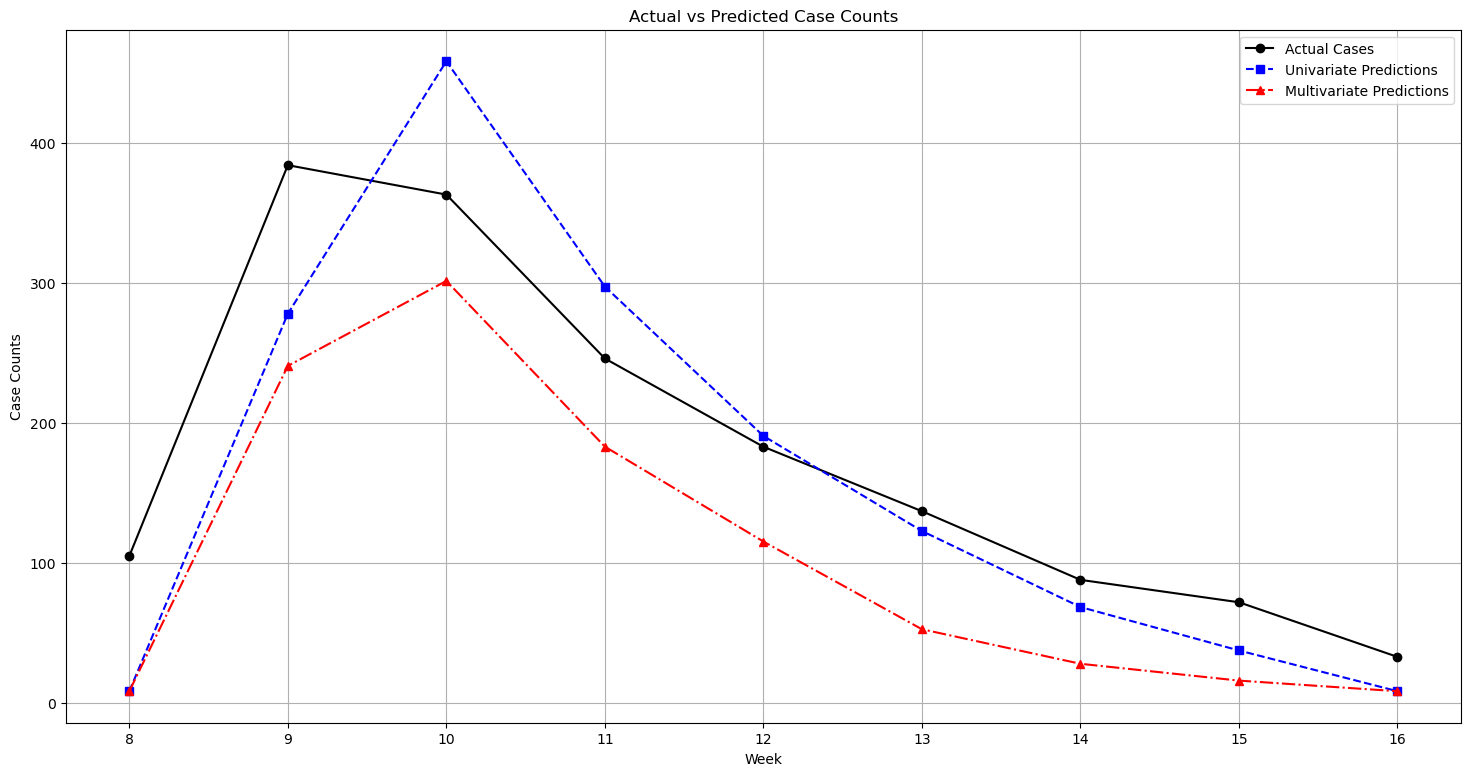

Univariate model is more accurate.


In [322]:
# Plot results
plt.figure(figsize=(18, 9))

# Plot actual case counts
plt.plot(test_data['Week'], y_test, label='Actual Cases', marker='o', color='black')

# Plot univariate predictions
plt.plot(test_data['Week'], y_pred_uni, label='Univariate Predictions', linestyle='--', marker='s', color='blue')

# Plot multivariate predictions
plt.plot(test_data['Week'], y_pred_multi, label='Multivariate Predictions', linestyle='-.', marker='^', color='red')

# Labels and title
plt.xlabel('Week')
plt.ylabel('Case Counts')
plt.title('Actual vs Predicted Case Counts')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Model Comparison
if mae_multi < mae_uni:
    print("Multivariate model is more accurate.")
elif mae_multi > mae_uni:
    print("Univariate model is more accurate.")
else:
    print("Both models perform similarly.")


##### PART 5: PREDICTING CASE COUNTS FROM EPIDEMIOLOGICAL DATA LAGS

##### QUESTION 5.1 Adding Variable to Represent Lag 1

In [323]:
# Copy the original merged_data_with_epidemics
lag1_dataset = merged_data_with_epidemics.copy()

# Add the lag_1 column (shift by 1)
lag1_dataset['lag_1'] = lag1_dataset['new_cases'].shift(1)

# Split into train and test sets
training_threshold = pd.Timestamp("2017-09-19")
testing_threshold = pd.Timestamp("2017-09-25")

train_lag1 = lag1_dataset[lag1_dataset['Date'] <= training_threshold].copy()
test_lag1  = lag1_dataset[lag1_dataset['Date'] >= testing_threshold].copy()

# Drop rows with NaN in lag_1
train_lag1 = train_lag1.dropna(subset=['lag_1'])
test_lag1 = test_lag1.dropna(subset=['lag_1'])

display(train_lag1)

# Define features and target
X_train_lag1 = train_lag1[['lag_1']]
y_train_lag1 = train_lag1['new_cases']
X_test_lag1  = test_lag1[['lag_1']]
y_test_lag1  = test_lag1['new_cases']

# Train the linear regression model
model_lag1 = LinearRegression()
model_lag1.fit(X_train_lag1, y_train_lag1)

# Predict and evaluate
y_pred_lag1 = model_lag1.predict(X_test_lag1)
corr_lag1 = np.corrcoef(y_test_lag1, y_pred_lag1)[0, 1]
mae_lag1  = mean_absolute_error(y_test_lag1, y_pred_lag1)

print(f"Correlation: {corr_lag1:.4f}")
print(f"Mean Absolute Error: {mae_lag1:.2f}")


,Week,Peste,Peste_Pulmonaire,Peste_Madagascar,Date,new_cases,lag_1
1,2,0,0,0,2017-08-14,1,0.0
2,3,0,0,0,2017-08-21,2,1.0
3,4,0,0,0,2017-08-28,7,2.0
4,5,0,0,0,2017-09-04,8,7.0
5,6,0,0,0,2017-09-11,33,8.0
6,7,73,117,38,2017-09-18,150,33.0


Correlation: 0.5659
Mean Absolute Error: 703.20


##### QUESTION 5.2 

In [324]:
df_lag123 = lag1_dataset.copy()

# Add lag_2 and lag_3 columns (using the original new_cases column)
df_lag123['lag_2'] = df_lag123['new_cases'].shift(2)
df_lag123['lag_3'] = df_lag123['new_cases'].shift(3)

display(df_lag123)

,Week,Peste,Peste_Pulmonaire,Peste_Madagascar,Date,new_cases,lag_1,lag_2,lag_3
0,1,0,0,0,2017-08-07,0,NaN,NaN,NaN
1,2,0,0,0,2017-08-14,1,0.0,NaN,NaN
2,3,0,0,0,2017-08-21,2,1.0,0.0,NaN
3,4,0,0,0,2017-08-28,7,2.0,1.0,0.0
4,5,0,0,0,2017-09-04,8,7.0,2.0,1.0
5,6,0,0,0,2017-09-11,33,8.0,7.0,2.0
6,7,73,117,38,2017-09-18,150,33.0,8.0,7.0
7,8,0,0,0,2017-09-25,105,150.0,33.0,8.0
8,9,139,160,124,2017-10-02,384,105.0,150.0,33.0
9,10,232,99,364,2017-10-09,363,384.0,105.0,150.0


In [325]:
# Drop rows with NaN in any of the lag columns (the first three rows will have NaN for at least one lag)
df_lag123 = df_lag123.dropna(subset=['lag_1', 'lag_2', 'lag_3'])

display(df_lag123)

,Week,Peste,Peste_Pulmonaire,Peste_Madagascar,Date,new_cases,lag_1,lag_2,lag_3
3,4,0,0,0,2017-08-28,7,2.0,1.0,0.0
4,5,0,0,0,2017-09-04,8,7.0,2.0,1.0
5,6,0,0,0,2017-09-11,33,8.0,7.0,2.0
6,7,73,117,38,2017-09-18,150,33.0,8.0,7.0
7,8,0,0,0,2017-09-25,105,150.0,33.0,8.0
8,9,139,160,124,2017-10-02,384,105.0,150.0,33.0
9,10,232,99,364,2017-10-09,363,384.0,105.0,150.0
10,11,149,27,295,2017-10-16,246,363.0,384.0,105.0
11,12,94,0,226,2017-10-23,183,246.0,363.0,384.0
12,13,59,0,55,2017-10-30,137,183.0,246.0,363.0


In [326]:
# Use the same train/test date thresholds as before
training_threshold = pd.Timestamp("2017-09-19")
testing_threshold = pd.Timestamp("2017-09-25")

train_lag123 = df_lag123[df_lag123['Date'] <= training_threshold].copy()
test_lag123  = df_lag123[df_lag123['Date'] >= testing_threshold].copy()

display(train_lag123)
display(test_lag123)

,Week,Peste,Peste_Pulmonaire,Peste_Madagascar,Date,new_cases,lag_1,lag_2,lag_3
3,4,0,0,0,2017-08-28,7,2.0,1.0,0.0
4,5,0,0,0,2017-09-04,8,7.0,2.0,1.0
5,6,0,0,0,2017-09-11,33,8.0,7.0,2.0
6,7,73,117,38,2017-09-18,150,33.0,8.0,7.0


,Week,Peste,Peste_Pulmonaire,Peste_Madagascar,Date,new_cases,lag_1,lag_2,lag_3
7,8,0,0,0,2017-09-25,105,150.0,33.0,8.0
8,9,139,160,124,2017-10-02,384,105.0,150.0,33.0
9,10,232,99,364,2017-10-09,363,384.0,105.0,150.0
10,11,149,27,295,2017-10-16,246,363.0,384.0,105.0
11,12,94,0,226,2017-10-23,183,246.0,363.0,384.0
12,13,59,0,55,2017-10-30,137,183.0,246.0,363.0
13,14,31,0,15,2017-11-06,88,137.0,183.0,246.0
14,15,15,0,0,2017-11-13,72,88.0,137.0,183.0
15,16,0,0,0,2017-11-20,33,72.0,88.0,137.0


In [327]:
# Define features and target
X_train_lag123 = train_lag123[['lag_1', 'lag_2', 'lag_3']]
y_train_lag123 = train_lag123['new_cases']

X_test_lag123  = test_lag123[['lag_1', 'lag_2', 'lag_3']]
y_test_lag123  = test_lag123['new_cases']


# Train the linear regression model using lag_1, lag_2, and lag_3 as predictors
lag123_model = LinearRegression()
lag123_model.fit(X_train_lag123, y_train_lag123)


# Predict on the test set and evaluate
y_pred_lag123 = lag123_model.predict(X_test_lag123)

corr_lag123 = np.corrcoef(y_test_lag123, y_pred_lag123)[0, 1]
mae_lag123  = mean_absolute_error(y_test_lag123, y_pred_lag123)

print(f"Correlation: {corr_lag123:.4f}")
print(f"Mean Absolute Error: {mae_lag123:.2f}")

Correlation: -0.3896
Mean Absolute Error: 25553.67


##### QUESTION 5.3: Line Plot Showing Ground Truth Case Counts in the Test Set

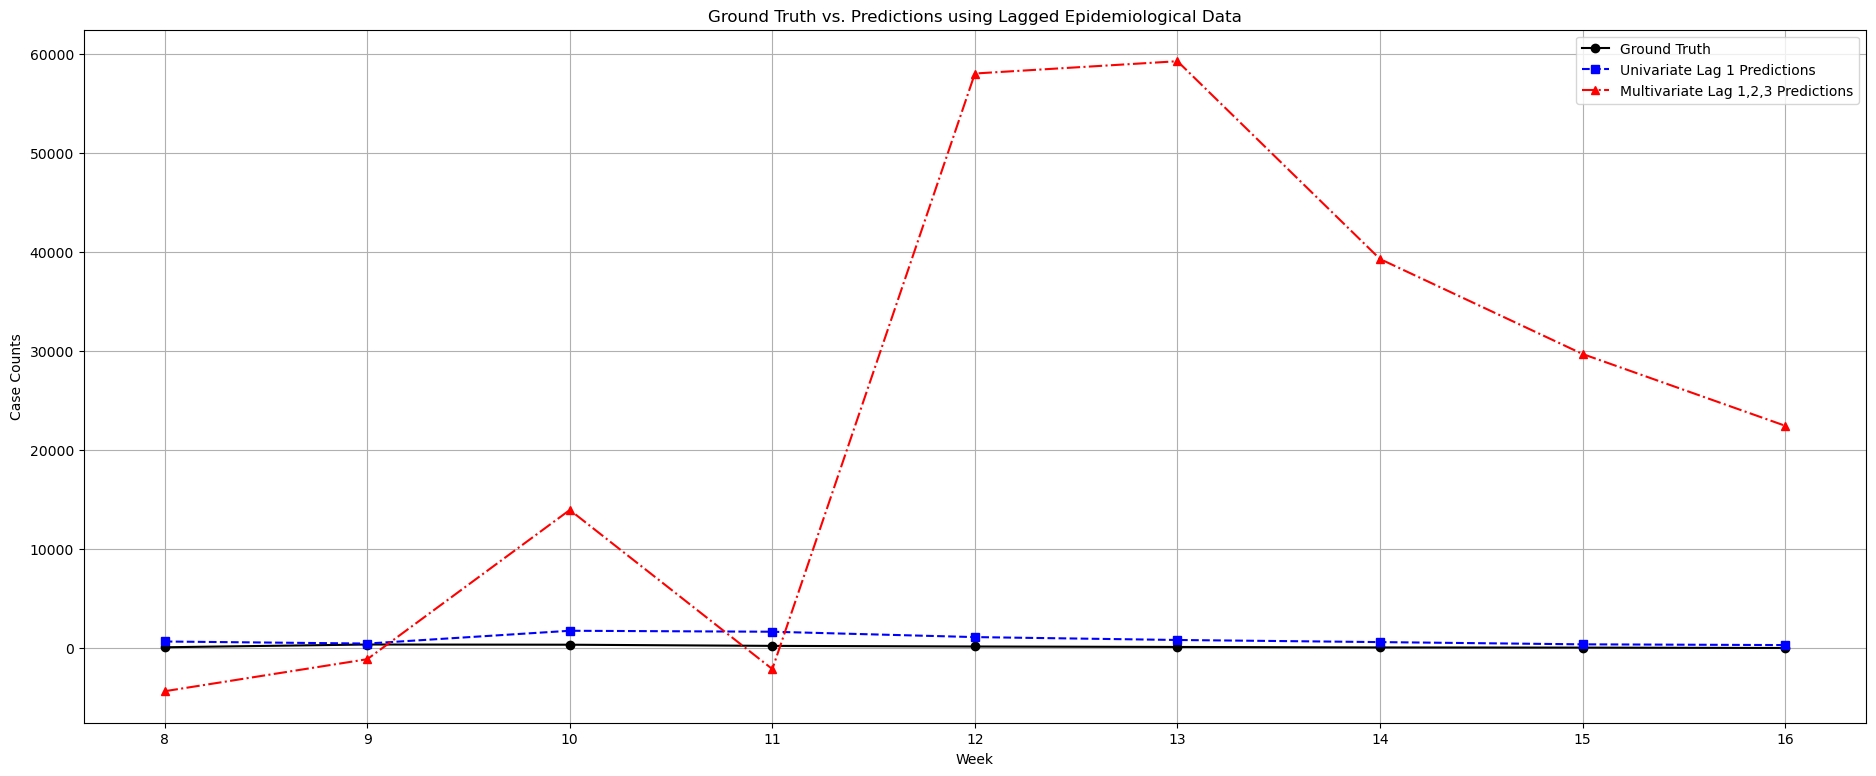

In [328]:
# Re-predict using the univariate model on the test set that has lag_1, lag_2, and lag_3 available
X_test_for_plot = test_lag123[['lag_1']]
y_pred_lag1_for_plot = model_lag1.predict(X_test_for_plot)

# And ground truth case counts are test_lag123['new_cases']

plt.figure(figsize=(23, 9))
plt.plot(test_lag123['Week'], test_lag123['new_cases'], label='Ground Truth', marker='o', color='black')
plt.plot(test_lag123['Week'], y_pred_lag1_for_plot, label='Univariate Lag 1 Predictions', linestyle='--', marker='s', color='blue')
plt.plot(test_lag123['Week'], y_pred_lag123, label='Multivariate Lag 1,2,3 Predictions', linestyle='-.', marker='^', color='red')


plt.xlabel('Week')
plt.ylabel('Case Counts')
plt.title('Ground Truth vs. Predictions using Lagged Epidemiological Data')
plt.legend()
plt.grid(True)
plt.show()

##### PART 6

##### QUESTION 6.1: Conbining Search Terms and Lagged Epidemiological Data

In [329]:
# Make a copy of your merged dataset
df_combined = merged_data_with_epidemics.copy()

# Add lag_1 column (the case count from the previous week)
df_combined['lag_1'] = df_combined['new_cases'].shift(1)

# Define the date thresholds as in your previous analysis
training_threshold = pd.Timestamp("2017-09-19")
testing_threshold  = pd.Timestamp("2017-09-25")

# Split the dataset into training and test sets based on the Date column
train_data_combined = df_combined[df_combined['Date'] <= training_threshold].copy()
test_data_combined  = df_combined[df_combined['Date'] >= testing_threshold].copy()

# Drop rows with NaN in lag_1 (e.g., the first row in the training set)
train_data_combined = train_data_combined.dropna(subset=['lag_1'])
test_data_combined  = test_data_combined.dropna(subset=['lag_1'])

# Define the predictors: the three search terms and the lag_1 variable
predictors = ['Peste', 'Peste_Pulmonaire', 'Peste_Madagascar', 'lag_1']

X_train_combined = train_data_combined[predictors]
y_train_combined = train_data_combined['new_cases']

X_test_combined  = test_data_combined[predictors]
y_test_combined  = test_data_combined['new_cases']

# Train the multivariate linear regression model
combined_model = LinearRegression()
combined_model.fit(X_train_combined, y_train_combined)

# Produce predictions on the test set
y_pred_combined = combined_model.predict(X_test_combined)

# Evaluate the model: compute the correlation and the mean absolute error (MAE)
corr_combined = np.corrcoef(y_test_combined, y_pred_combined)[0, 1]
mae_combined  = mean_absolute_error(y_test_combined, y_pred_combined)

print(f"Correlation: {corr_combined:.4f}")
print(f"Mean Absolute Error: {mae_combined:.2f}")


Correlation: 0.6344
Mean Absolute Error: 409.22


##### QUESTION 6.2: Line Plot Showing Ground Truth Case Count in the Test Set

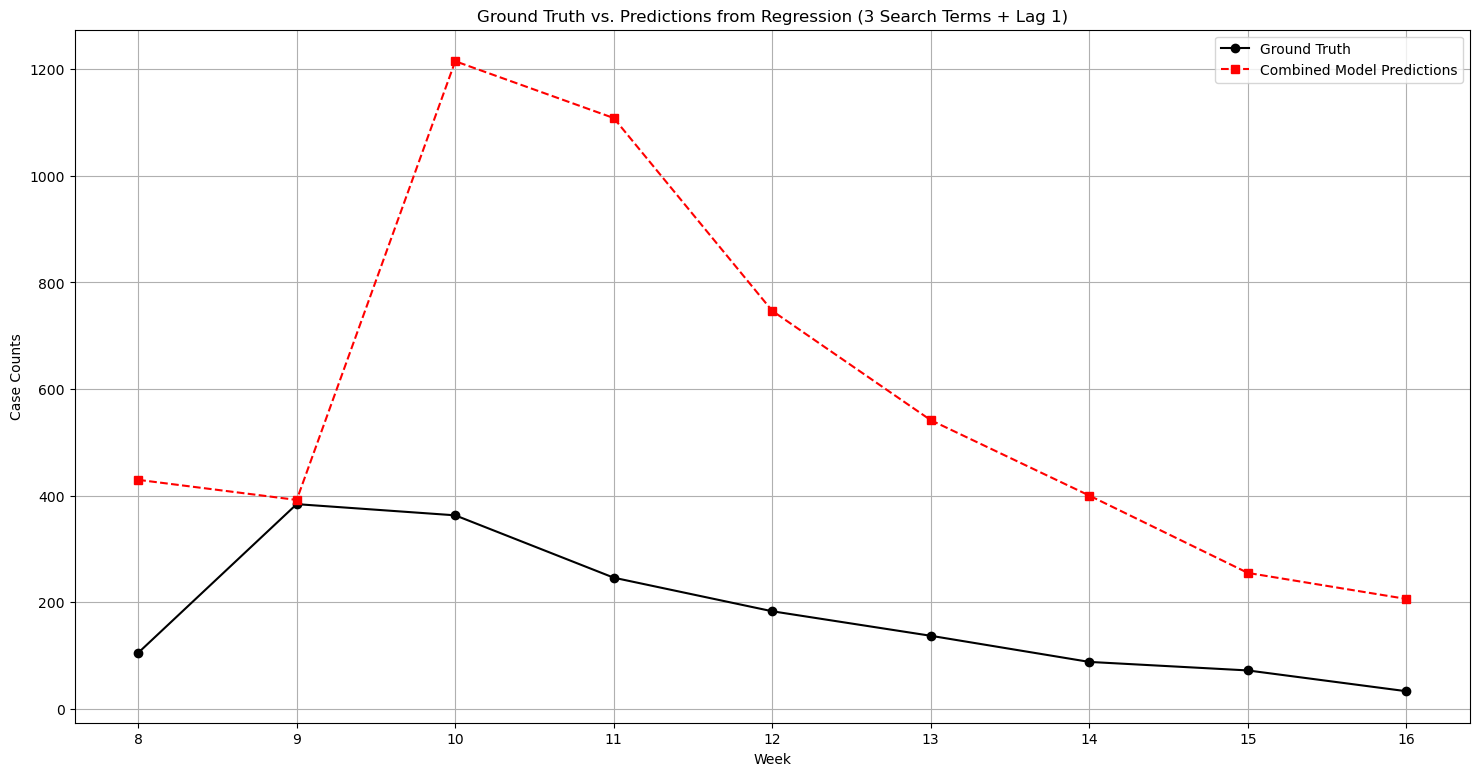

In [330]:
plt.figure(figsize=(18, 9))

# Plot the ground truth case counts from the test set
plt.plot(test_data_combined['Week'], y_test_combined, label='Ground Truth', marker='o', color='black')

# Plot the predictions from your regression model
plt.plot(test_data_combined['Week'], y_pred_combined, label='Combined Model Predictions', linestyle='--', marker='s', color='red')

plt.xlabel('Week')
plt.ylabel('Case Counts')
plt.title('Ground Truth vs. Predictions from Regression (3 Search Terms + Lag 1)')
plt.legend()
plt.grid(True)
plt.show()
